In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
!rm -r machine-learning/
!git clone https://github.com/emineedagulsen/machine-learning

Cloning into 'machine-learning'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.


In [ ]:
dataFrame = pd.read_csv('machine-learning/customer_staying_or_not.csv') # replace with your file

In [ ]:
dataFrame.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,MOTHER_EDU,FATHER_EDU,#_SIBLINGS,KIDS,MOTHER_JOB,FATHER_JOB,STUDY_HRS,READ_FREQ,READ_FREQ_SCI,ATTEND_DEPT,IMPACT,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,1,1,2,3,1,2,5,3,2,2,1,1,1,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,1,2,3,2,1,2,1,2,2,2,1,1,1,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,2,2,2,2,1,2,1,2,1,2,1,1,1,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,2,1,2,5,1,2,1,3,1,2,1,1,1,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,4,3,3,2,1,2,4,2,1,1,1,1,1,2,1,2,2,2,1,2,2,1,1


In [ ]:
pd.set_option('display.max_columns', None) # print all columns
#print(dataFrame['CreditScore'])
X = dataFrame.iloc[:,3:13] # select relevant rows and columns to X (here for example columns 5,6,7,8,9,10 and 11)
y = dataFrame.iloc[:, -1] # select column(s) for y (here only the last column)
# Capital X and lower-case y comes from Linear Algebra. The input is often a 2D array (matrix, named X) while the output is often a 1D array (vector, named y)


In [ ]:
X = pd.get_dummies(X) # convert ALL text-columns to categorical variables (One Hot encoding), e.g. gender, country etc. 
columnNames = list(X.columns) # grab column-names before converting to numpy array
X = X.values # convert from Pandas dataframe to numpy array
y = y.values # convert from Pandas dataframe to numpy array

In [ ]:
print(X[0:5,:])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X) # calculate mean and standard deviation and convert dataframe to numpy array

In [ ]:
print(X[0:5,:])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42 )
# random_state set to some value will provide same output


In [ ]:
model = Sequential()
model.add(Dense(4,activation='relu')) # 4 outputs. It will automatically adapt to number inputs
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1)) # Final output node for prediction. In this case, only one output neuron

adam = Adam(learning_rate=0.001) 
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])  


In [ ]:
model.fit(X_train,y_train,epochs=100, verbose=1)  # does the actual WORK !. verbose=1 will show output. 0 = no output.



Epoch 1/100
4/4 [==============================] - 1s 4ms/step - loss: 4.5188 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 3.7544 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 3.4710 - accuracy: 0.0086
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 3.2453 - accuracy: 0.0172
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 3.0477 - accuracy: 0.0172
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 2.8697 - accuracy: 0.0172
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 2.7128 - accuracy: 0.0172
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 2.5598 - accuracy: 0.0259
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 2.4025 - accuracy: 0.0259
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 2.2496 - accuracy: 0.0431
Epoch 11/100
4/4 [===

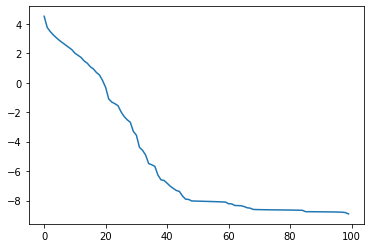

In [ ]:
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)),y=loss)



In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5) # creates a new array with true/false based on the boolean test

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 0  0  0  0]
 [ 4  9  0  0]
 [ 0 12  0  0]
 [ 0  4  0  0]]


In [ ]:
#print(columnNames) # first print column names, so you can enter new data in the correct columns
new_value = [[120,24,3,200,0,1,0,55000,0,1,0,1,0]] # enter new data in 2D array. Only numbers + dummy variables. 
new_value = scaler.transform(new_value) # Don't forget to scale!
model.predict(new_value)


['AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK', 'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU', 'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB', 'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT', 'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS', 'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID', 'GRADE']


array([[4.35358]], dtype=float32)

In [ ]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [ ]:
myModel = load_model('my_model.h5') # myModel is ready for predicting right away!

